# Data Challenge#2

## Mei Tessum

In this data challenge, I will help Yammer, a social network for communicating with coworkers, to identify the problem(s) that causes of a dip in number of engaged users from July 28 2014, and propose recommending solutions for the problem.

First, I came up with a list of possible causes for the dip, for which I can test them later with data:

1. Product dysfunction: certain feature(s) stop working properly, and therefore loss users.
2. Feedback dysfunction: the tracking of the users stop working properly, and therefore miscount the users.
3. Marketing issue: decrease or change advertisement causes less new user.
4. Churn: loss certain part of the users, for example, users from certain region.

Then I test my hypotheses follow this order: 
1. checked the new user data and ruled out the new user issue. 
2. checked the usage count for different product to see the source of dip from existing users and found usages for major products were droping, due to each product was managed by different product team, it's not likely have dysfunction of major products at the same time. 
3. checked the usage count from different region and found usages from many regions were decreasing. 
4. checked the usage count from different device and found usages from all device types were decreasing, especially from mobile phone, indicating it's worthwhile to check the mobile user interface, but it may not be the essential cause. 
5. checked the different email events and found a decrease in email clickthrough issue.  

Summary:
The major cause for the dip is likely associated with the decrease of email clickthrough. In addtion, some issues of mobile user interface may exacerbate this decrease in phone users. 
I will recommend the product team to check what causes the email clickthrough issue and engineering team to improve mobile user interface. 

### Load functions and data

In [110]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [111]:
users=pd.read_csv('C://Users/Mei/Downloads/yammer_users.csv')
#users.head()

In [112]:
events=pd.read_csv('C://Users/Mei/Downloads/yammer_events.csv')
events.occurred_at = pd.to_datetime(events.occurred_at)

In [113]:
emails=pd.read_csv('C://Users/Mei/Downloads/yammer_emails.csv')
emails.occurred_at = pd.to_datetime(emails.occurred_at)
#emails.head()

### Check new user data

Frist, I would like to check the change of number of new users over time, especialy the active new users. 

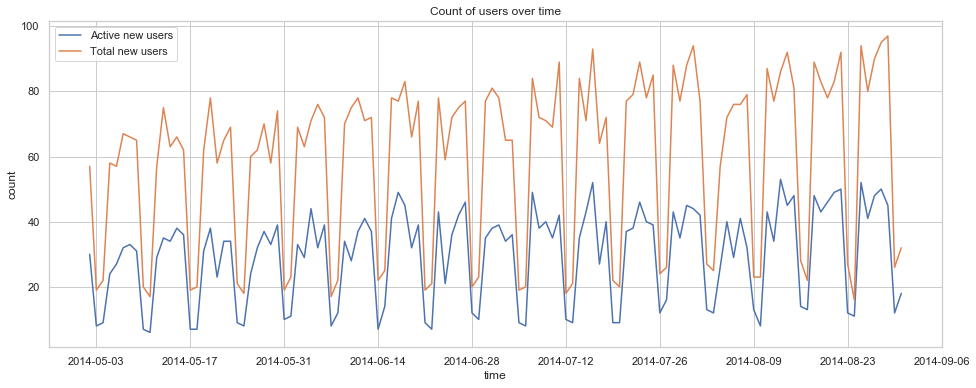

In [114]:
#Group data by date to aggregate the count of users
users.created_at = pd.to_datetime(users.created_at)
user_ct = users.groupby(users.created_at.dt.date).count()[["user_id", "activated_at"]]
user_ct.reset_index(level=0, inplace=True)
user_ct.created_at = pd.to_datetime(user_ct.created_at)
user_ct.user_id = pd.to_numeric(user_ct.user_id,downcast='float')
user_ct.activated_at = pd.to_numeric(user_ct.activated_at,downcast='float')

# select subset of data from interest time period (around the drip)
focus_period = (user_ct.created_at > "2014-5-1") & (user_ct.created_at <= "2014-10-1")
user_ct=user_ct.loc[focus_period]

# plot results
plt.figure(figsize=(16, 6))
sns.lineplot(x=user_ct.created_at, y=user_ct.activated_at,label="Active new users")
sns.lineplot(x=user_ct.created_at, y=user_ct.user_id,label="Total new users")
plt.title('Count of users over time')
plt.ylabel('count')
plt.xlabel('time')
plt.show()

Although there was a dip in total number of new users during the first week of August 2014, however, the number of active new users kept the same pattern, and therefore the cause of the dip in number of engaged users from July 28 2014 is not likely associated with new users (instead it is likely associated with existing users). Thus I rule out new user related marketing issues from my possible cause list.    

### Check current user's product usages, regions and device types

Then I woulk like to check existing users on general product usage over time to identify which product cuased decreased usage. 

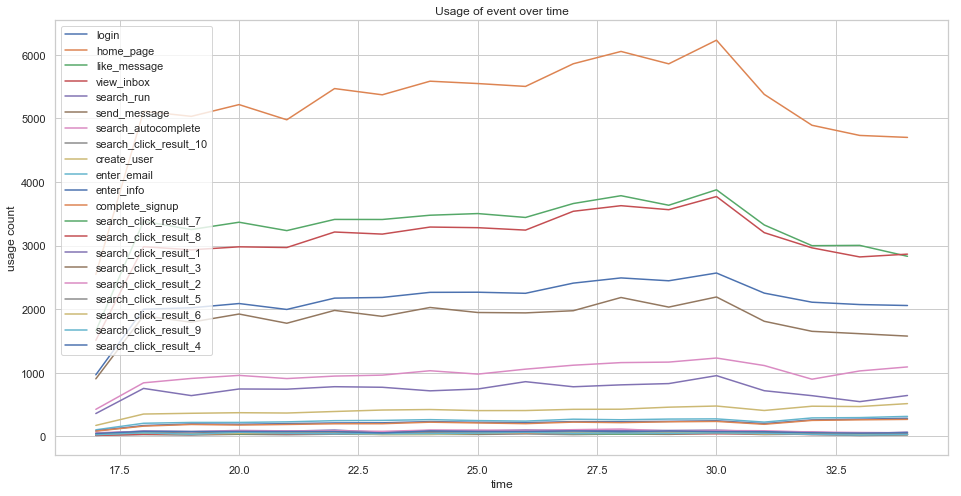

In [115]:
focus_period = (events.occurred_at > "2014-5-1") & (events.occurred_at <= "2014-10-1")
events=events.loc[focus_period]
event_names = pd.unique(events.event_name)
plt.figure(figsize=(16, 8))
for name in event_names:
    events_subset=events[events.event_name == name]
    event_ct = events_subset.groupby(events.occurred_at.dt.strftime('%W')).count()   
    sns.lineplot(x=event_ct.index, y=event_ct.event_name, label=name)
plt.legend(loc='upper left')
plt.title('Usage of event over time')
plt.xlabel('time')
plt.ylabel('usage count')
plt.savefig('Event_Log')

I found usages of "home page", "like message", "view inbox", "login", "search run", "send_message","search autocomplete" and certain "search click result" were all decreased, suggesting either product had major dysfunction or usage from certain location or device raised flag. I then would like to check the usages by region and device. 

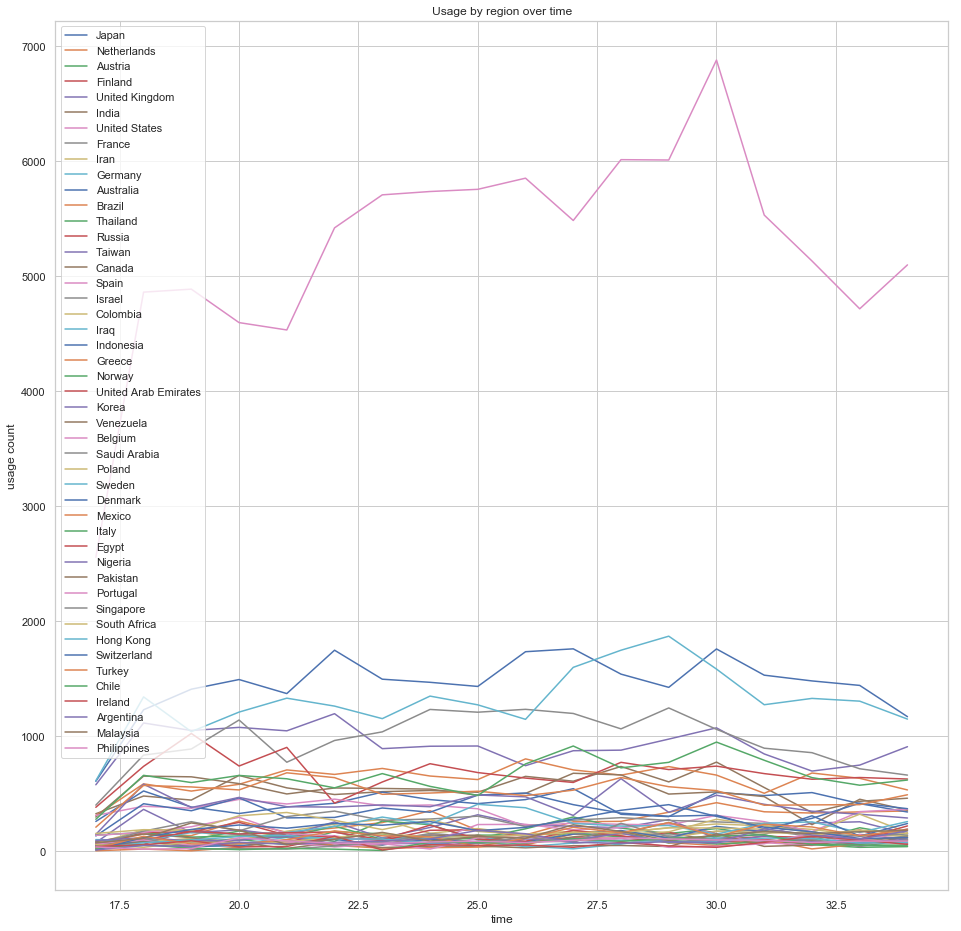

In [116]:
event_regions = pd.unique(events.location)
plt.figure(figsize=(16,16))
for region in event_regions:
    events_subset=events[events.location == region]
    event_ct = events_subset.groupby(events.occurred_at.dt.strftime('%W')).count()   
    sns.lineplot(x=event_ct.index, y=event_ct.location, label=region)
plt.legend(loc='upper left')
plt.title('Usage by region over time')
plt.xlabel('time')
plt.ylabel('usage count')
plt.savefig('region_Log')

I found usages from many regions, such as US, UK, Japan, India, France, Germany, etc. were all decreased but still had usage, suggesting no region had problem assessing Yammer or had special political/cultural issues, I should further check the usages by device. Here instead of looking at specific device model, I look for device type, i.e. PC, phone and tablet.  

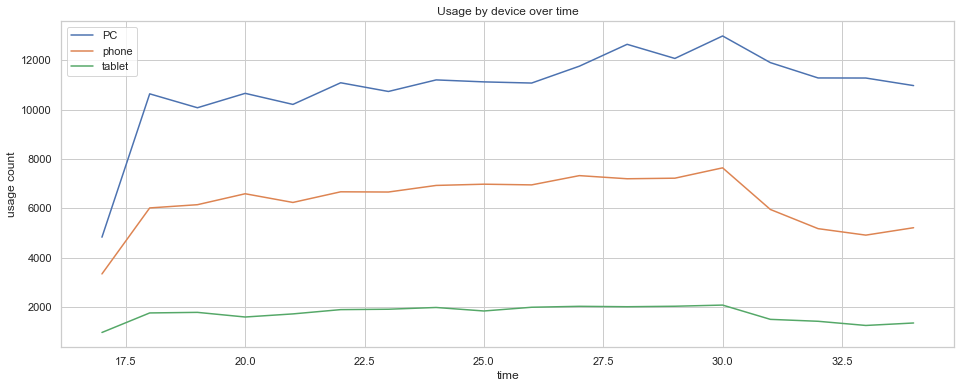

In [117]:
# check all the device models
pd.unique(events.device)

# make a dictionary to assign device type for each model
device_dict={}
device_dict['dell inspiron notebook'] = "PC"
device_dict['iphone 5']="phone"
device_dict['iphone 4s']="phone"
device_dict['windows surface']="tablet"
device_dict['macbook air']= "PC"
device_dict['iphone 5s'] ="phone"
device_dict['macbook pro']= "PC"
device_dict['kindle fire']="tablet"
device_dict['ipad mini']="tablet"
device_dict['nexus 7']="phone"
device_dict['nexus 5']="phone"
device_dict['samsung galaxy s4']="phone"
device_dict['lenovo thinkpad']= "PC"
device_dict['samsumg galaxy tablet']="tablet"
device_dict['acer aspire notebook']= "PC"
device_dict['asus chromebook']= "PC"
device_dict['htc one']="phone"
device_dict['nokia lumia 635']="phone"
device_dict['samsung galaxy note']="phone"
device_dict['acer aspire desktop']="PC"
device_dict['mac mini']= "PC"
device_dict['hp pavilion desktop']="PC"
device_dict['dell inspiron desktop']="PC"
device_dict['ipad air']="tablet"
device_dict['amazon fire phone']="phone"
device_dict['nexus 10']="tablet"

# create a variable "device_type" 
def device_type(device_name):
    return device_dict[device_name]

events["device_type"] = events.device.apply(device_type)

# plot results
event_devices = pd.unique(events.device_type)
plt.figure(figsize=(16,6))
for device in event_devices:
    events_subset=events[events.device_type == device]
    event_ct = events_subset.groupby(events.occurred_at.dt.strftime('%W')).count()   
    sns.lineplot(x=event_ct.index, y=event_ct.device_type, label=device)
plt.legend(loc='upper left')
plt.title('Usage by device over time')
plt.xlabel('time')
plt.ylabel('usage count')
plt.savefig('device_Log')

I found usages from all device types decreased especially from mobile phone, indicating it's worthwhile to check the mobile user interface, but it is not the essential cause.

### Check current users email events

Finally, I would like to check email action events.

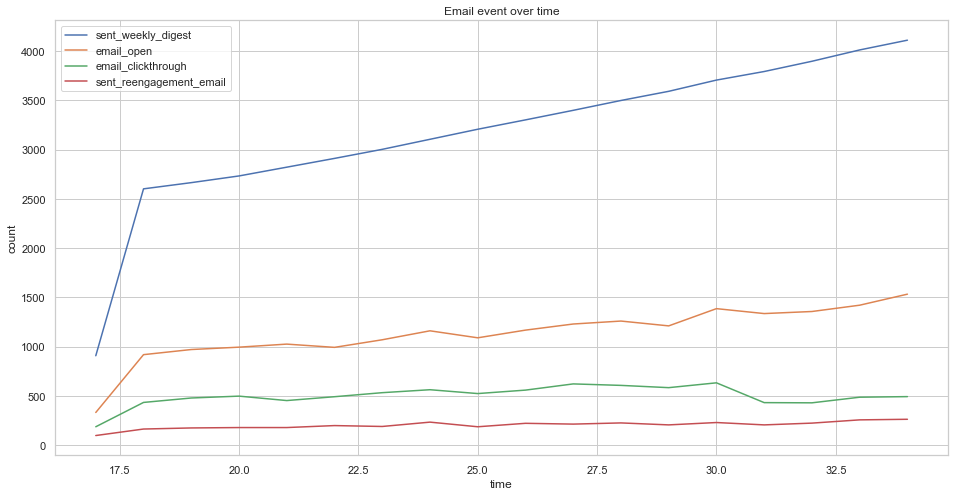

In [118]:
focus_period = (emails.occurred_at > "2014-5-1") & (emails.occurred_at <= "2014-10-1")
emails=emails.loc[focus_period]
email_actions = pd.unique(emails.action)

plt.figure(figsize=(16, 8))
for action in email_actions:
    emails_subset=emails[emails.action == action]
    email_ct = emails_subset.groupby(emails.occurred_at.dt.strftime('%W')).count()   
    sns.lineplot(x=email_ct.index, y=email_ct.action, label=action)
plt.legend(loc='upper left')
plt.title('Email event over time')
plt.xlabel('time')
plt.ylabel('count')
plt.savefig('Email_Log')

Among all the email events, only email clichthrough showed decrease for the time period I am looking for, suggesting email clichthrough is the issue cause major dip.  

### Conclusions and recommendations 

The major cause for the dip is likely associated with the decrease of email clickthrough. In addition, some issues of mobile user interface may exacerbate this decrease in phone users. I will recommend the product team to check what causes the email clickthrough issue and engineering team to improve mobile user interface.